#1. PERKENALAN

In [ ]:
'''
Nama  : Rugaya Muksin BSA
Batch : 006
Phase : 1
ML    : 2

'''

**KASUS**

---
Source dataset: https://www.kaggle.com/iabhishekofficial/mobile-price-classification?select=train.csv

Bob telah memulai perusahaan selulernya sendiri. Dia ingin memberikan perlawanan keras kepada perusahaan besar seperti Apple, Samsung, dll.

Dia tidak tahu bagaimana memperkirakan harga ponsel yang dibuat oleh perusahaannya. Di pasar ponsel yang kompetitif ini, tidak bisa begitu saja berasumsi. Untuk mengatasi masalah ini ia mengumpulkan data penjualan ponsel dari berbagai perusahaan.

Bob ingin mengetahui beberapa hubungan antara fitur ponsel (misalnya: - RAM, Memori Internal dll) dan harga jualnya. Tapi dia tidak begitu pandai Machine Learning. Jadi dia membutuhkan bantuan Anda untuk memecahkan masalah ini.

Dalam masalah ini tidak perlu memprediksi harga sebenarnya tetapi kisaran harga yang menunjukkan seberapa tinggi harganya


**PROBLEM STATEMENT**

---
1.   Mencari hubungan antar fitur ponsel dengan harga jualnya
2.   Memprediksi kisaran harga yang menunjukkan seberapa tinggi harganya. Kisaran harga:

      *   Low cost (0)
      *   Medium cost (1)
      *   High cost (2)
      *   Very high cost (3)

---

Untuk mencari hubungan antar fitur ponsel dengan harga jual saya akan melakukan analisa berdasarkan:
1.   EDA
2.   Correlation Score
3.   Feature Importance
---



Dalam memprediksi kisaran harga saya akan membuat dua model machine learning yaitu XGBoost classifier dan AdaBoost classifier, dan akan mencari model terbaik untuk digunakan dalam memprediksi kisaran harga.

Based on my personal experience, kedua algoritma ini sangat baik dalam menghasilkan metric score yang lebih tinggi dibandingkan dengan algoritma yang lain. Sehingga saya memutuskan untuk membuat dua model dengan kedua algoritma tersebut.



#2. IMPORT LIBRARIES

In [13]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
from matplotlib import colors
from matplotlib.colors import ListedColormap
import seaborn as sns
from scipy import stats
%matplotlib inline
plt.style.use('fivethirtyeight')

#ignore warnings
import warnings
warnings.filterwarnings('ignore')

# Split Dataset and Standarize the Datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler

#3. DATA LOADING

In [2]:
ori_df =  pd.read_csv('mobile_classification.csv')
df = ori_df.copy()
df.shape

(2000, 21)

In [ ]:
df.head(5)

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,2,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,6,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,6,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,9,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,14,1208,1212,1411,8,2,15,1,1,0,1


#4. DATA CLEANING

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

In [ ]:
'''
Cek jumlah dan presentase missing value pada setiap variabel yang ada dalam
dataset.

'''

mv = pd.DataFrame(df.isnull().sum(), columns=['No. of missing values'])
mv['% missing_values'] = (mv/len(df)).round(2)*100
mv

,No. of missing values,% missing_values
battery_power,0,0.0
blue,0,0.0
clock_speed,0,0.0
dual_sim,0,0.0
fc,0,0.0
four_g,0,0.0
int_memory,0,0.0
m_dep,0,0.0
mobile_wt,0,0.0
n_cores,0,0.0


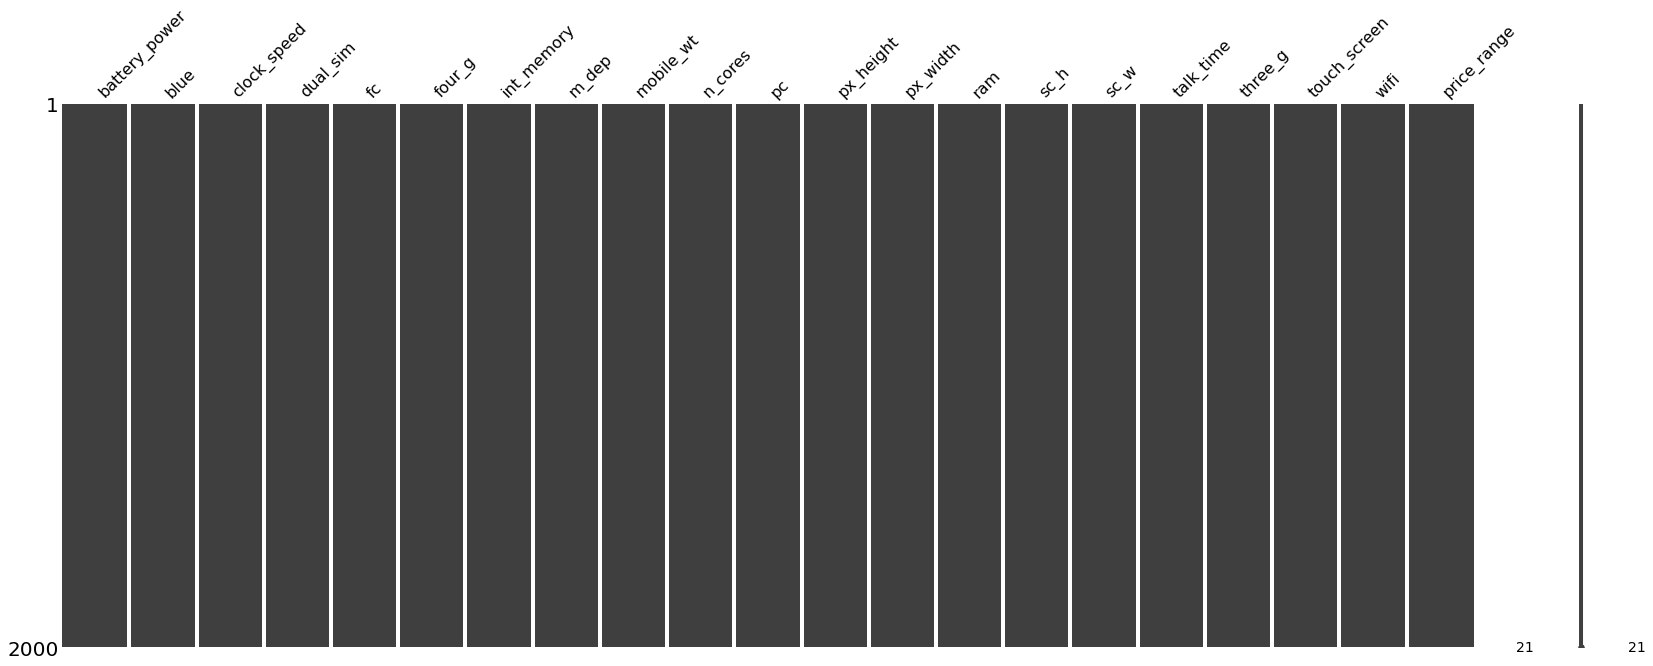

In [ ]:
import missingno as msno

msno.matrix(df)  # just to visualize. no missing value.

Tampaknya dataset yang akan digunakan bersih dari missing value.

#5. EDA

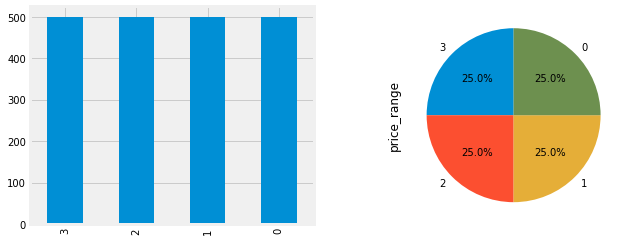

In [ ]:
'''
Visualisasi variabel target (price_range)

'''

fig, axs = plt.subplots(ncols=2, figsize=(10,4))
df['price_range'].value_counts().plot(kind='bar', ax=axs[0])
df['price_range'].value_counts().plot.pie(autopct='%1.1f%%', startangle = 90, ax=axs[1])

*   Terlihat bahwa fitur target memiliki 4 label yaitu 0 (low cost), 1 (medium cost), 2 (high cost) dan 3 (very high cost)
*   Proporsi antara label pada fitur target tersebar secara merata pada dataset 


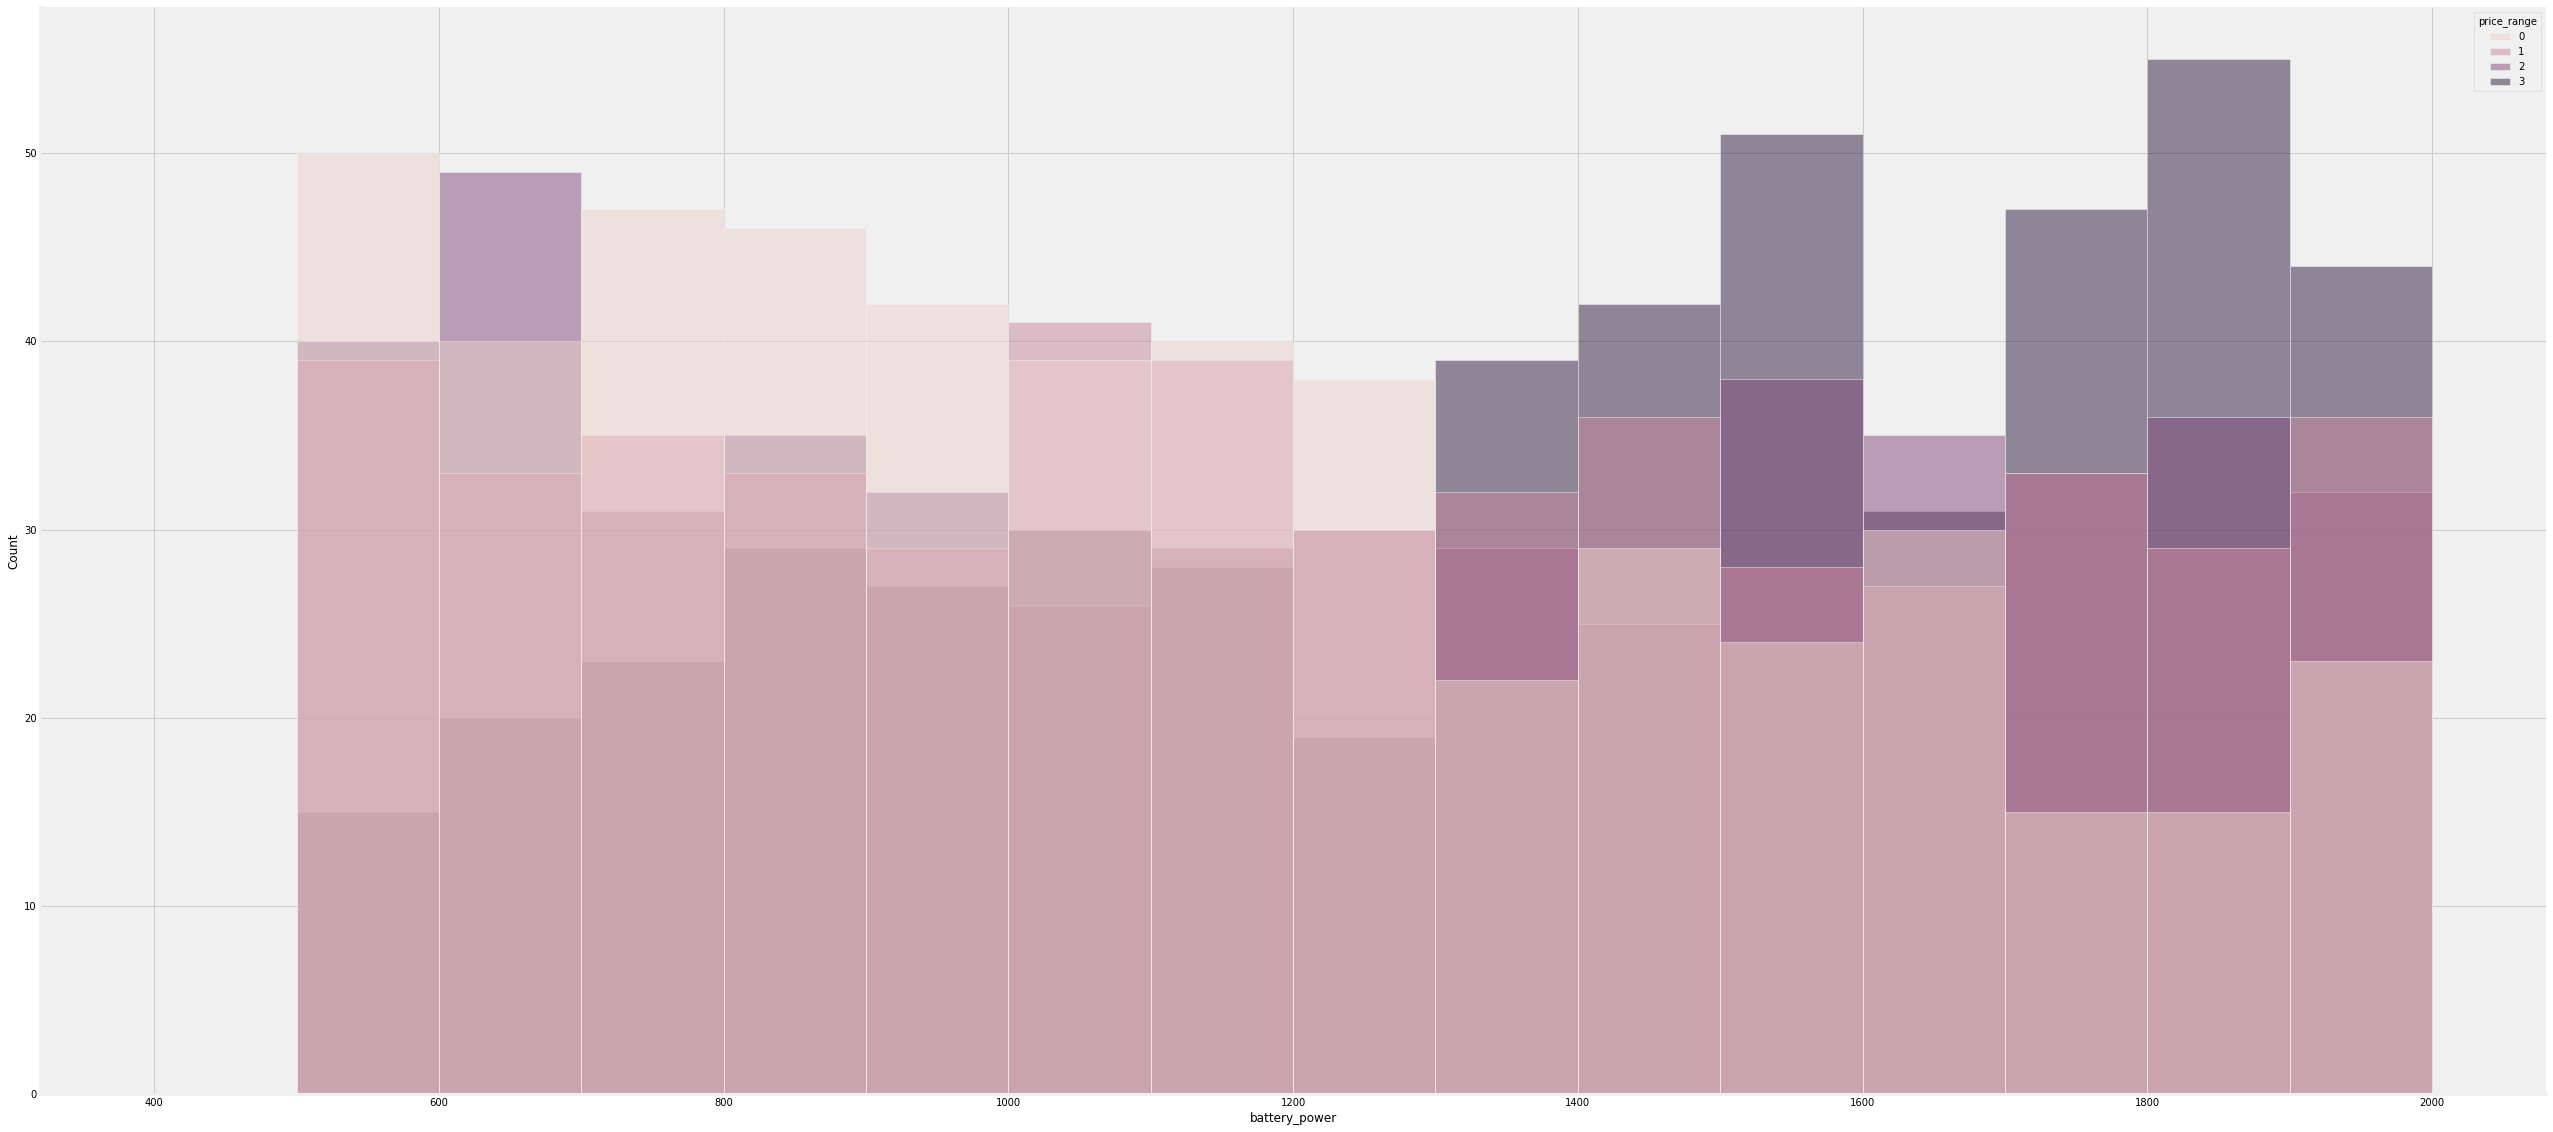

In [8]:
bins = [400, 500, 600, 700, 800, 900, 1000, 1100, 1200, 1300, 1400, 1500, 1600, 1700, 1800, 1900, 2000]
plt.figure(figsize=(40, 20))
sns.histplot(data=df, x="battery_power", bins=bins, hue="price_range");
sns.despine(top=True, right=True)

*   Label 0 dan label 1 memiliki kapasitas kekuatan baterai 500 > 2000
*   Label 2 memiliki kapasitas kekuatan baterai di rentang 600 > 2000
*   Label 3 memiliki kapasitas kekuatan baterai >1300

**Dari informasi yang didapatkan, dapat disimpulkan bahwa kapasitas kekuatan baterai memiliki pengaruh yang besar dalam menentukan kisaran harga ponsel**





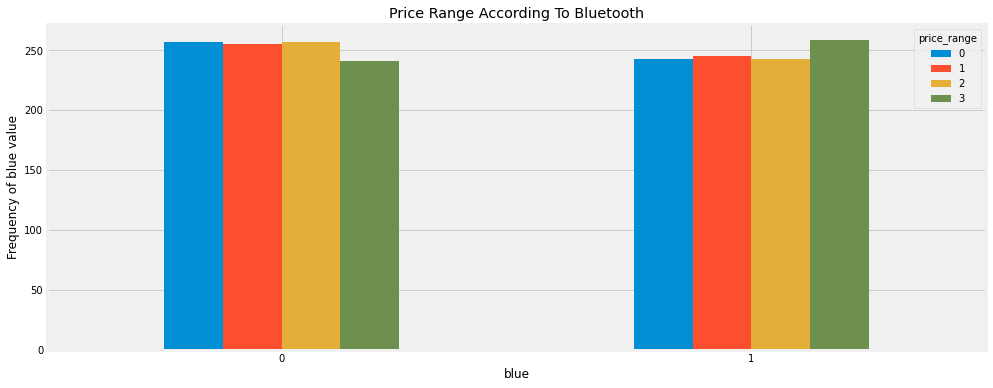

In [ ]:
pd.crosstab(df.blue, df.price_range).plot(kind="bar",figsize=(15,6))
plt.title('Price Range According To Bluetooth')
plt.xlabel('blue')
plt.xticks(rotation = 0)
plt.ylabel('Frequency of blue value')
plt.show()

Terlihat bahwa proporsi ponsel yang memiliki bluetooth dan tidak memiliki bluetooth hampir simetrik. Sehingga dapat disimpulkan bahwa fitur bluetooth tidak memiliki pengaruh yang kuat dalam menentukan kisaran harga ponsel.

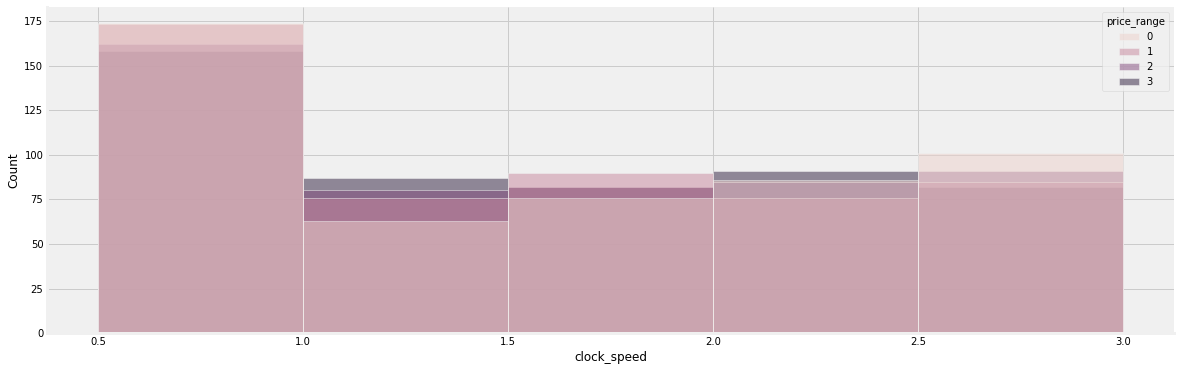

In [ ]:
bins = [0.5, 1.0, 1.5, 2.0, 2.5, 3]
plt.figure(figsize=(18, 6))
sns.histplot(data=df, x="clock_speed", bins=bins, hue="price_range");
sns.despine(top=True, right=True)

Dari visualisasi diatas fitur clock_speed tidak memiliki pengaruh dalam penentuan kisaran harga ponsel

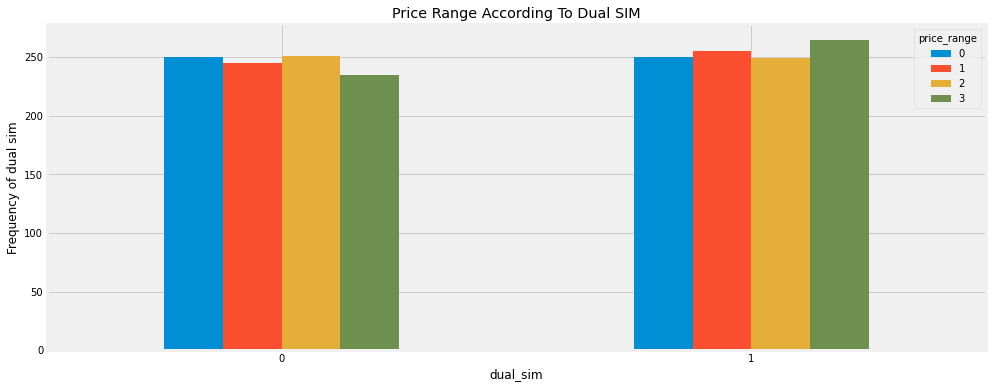

In [ ]:
pd.crosstab(df.dual_sim, df.price_range).plot(kind="bar",figsize=(15,6))
plt.title('Price Range According To Dual SIM')
plt.xlabel('dual_sim')
plt.xticks(rotation = 0)
plt.ylabel('Frequency of dual sim')
plt.show()

Terlihat bahwa proporsi ponsel yang memiliki dual sim dan tidak memiliki dual sim hampir simetrik. Sehingga dapat disimpulkan bahwa fitur dual_sim tidak memiliki pengaruh yang kuat dalam menentukan kisaran harga ponsel.

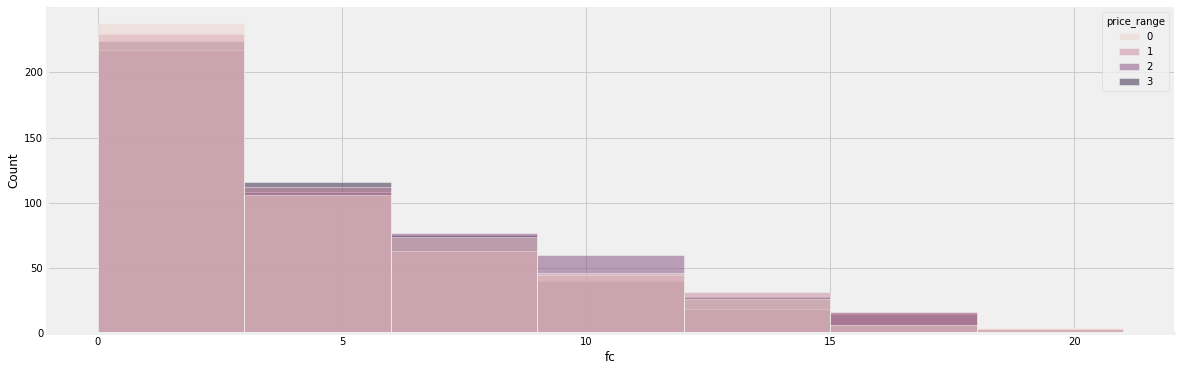

In [ ]:
bins = [0, 3, 6, 9, 12, 15, 18, 21]
plt.figure(figsize=(18, 6))
sns.histplot(data=df, x="fc", bins=bins, hue="price_range");
sns.despine(top=True, right=True)

Dari visualisasi diatas fitur fc tidak memiliki pengaruh dalam penentuan kisaran harga ponsel

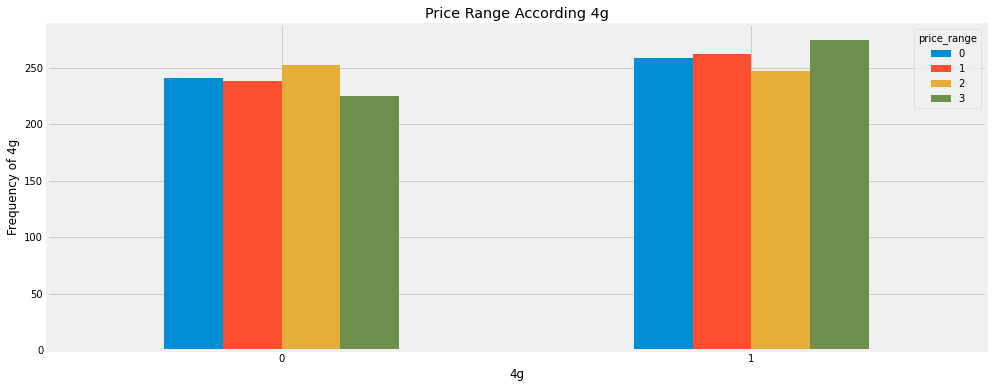

In [ ]:
pd.crosstab(df.four_g, df.price_range).plot(kind="bar",figsize=(15,6))
plt.title('Price Range According 4g')
plt.xlabel('4g')
plt.xticks(rotation = 0)
plt.ylabel('Frequency of 4g')
plt.show()

Dari visualisasi ini terlihat bahwa ponsel dengan 4g memiliki jumlah dengan kisaran harga yang lebih tinggi, namun ponsel tanpa 4g juga tidak berbeda jauh selisihnya. Sehingga dapat disimpulkan fitur four_g tidak memiliki pengaruh yang kuat dalam penentuan kisaran harga ponsel.

In [ ]:
df['int_memory'].unique()

array([ 7, 53, 41, 10, 44, 22, 24,  9, 33, 17, 52, 46, 13, 23, 49, 19, 39,
       47, 38,  8, 57, 51, 21,  5, 60, 61,  6, 11, 50, 34, 20, 27, 42, 40,
       64, 14, 63, 43, 16, 48, 12, 55, 36, 30, 45, 29, 58, 25,  3, 54, 15,
       37, 31, 32,  4, 18,  2, 56, 26, 35, 59, 28, 62])

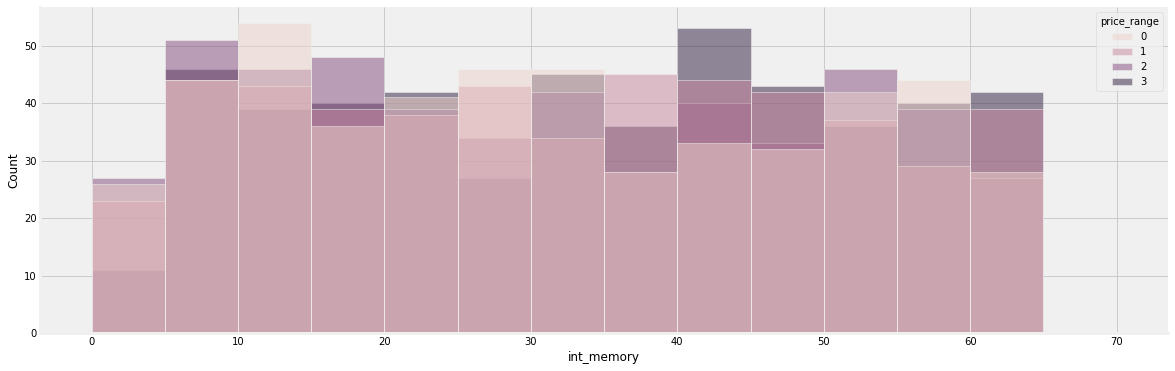

In [ ]:
bins = [0, 5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70]
plt.figure(figsize=(18, 6))
sns.histplot(data=df, x="int_memory", bins=bins, hue="price_range");
sns.despine(top=True, right=True)

Dari visualisasi diatas fitur int_memory tidak memiliki pengaruh dalam penentuan kisaran harga ponsel

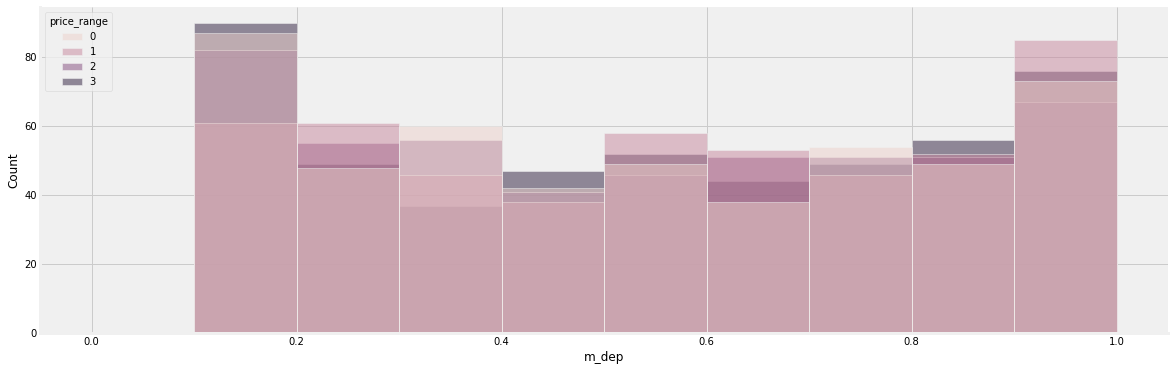

In [ ]:
bins = [0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1]
plt.figure(figsize=(18, 6))
sns.histplot(data=df, x="m_dep", bins=bins, hue="price_range");
sns.despine(top=True, right=True)

Dari visualisasi diatas fitur m_dep tidak memiliki pengaruh dalam penentuan kisaran harga ponsel

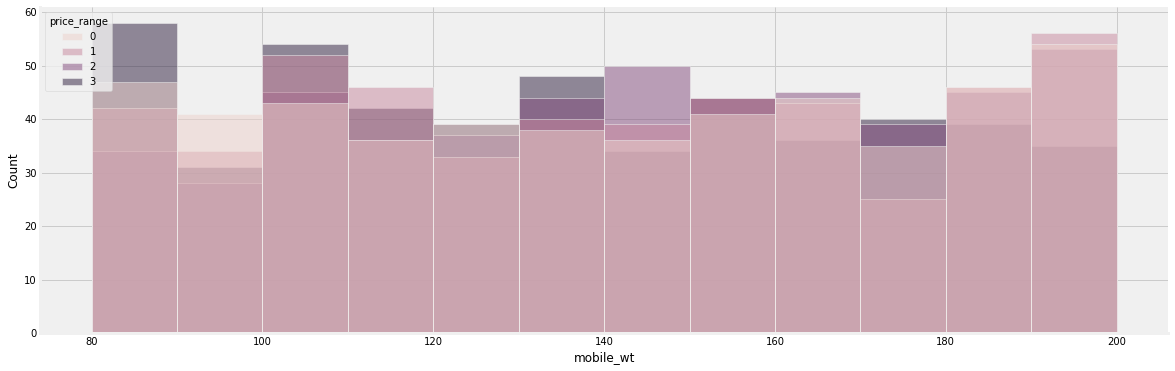

In [ ]:
bins = [80, 90, 100, 110, 120, 130, 140, 150, 160, 170, 180, 190, 200]
plt.figure(figsize=(18, 6))
sns.histplot(data=df, x="mobile_wt", bins=bins, hue="price_range");
sns.despine(top=True, right=True)

Dari visualisasi diatas fitur m_dep tidak memiliki pengaruh dalam penentuan kisaran harga ponsel

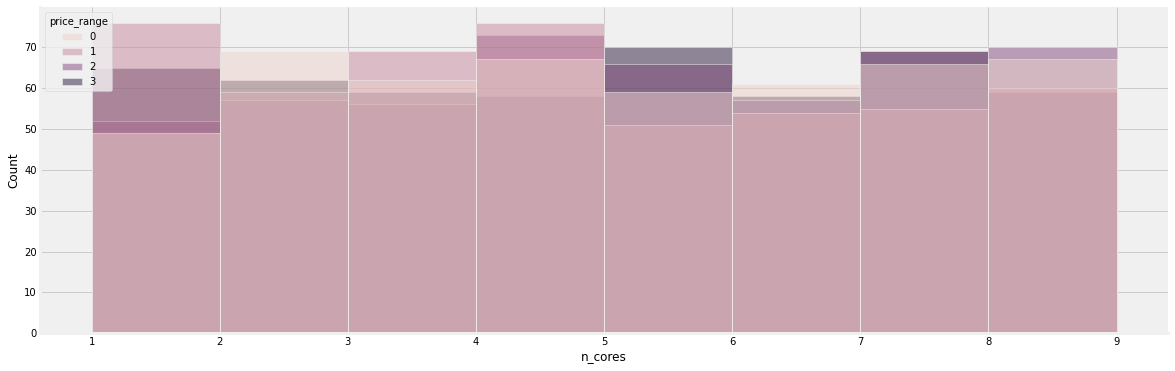

In [ ]:
bins = [1, 2, 3, 4, 5, 6, 7, 8, 9]
plt.figure(figsize=(18, 6))
sns.histplot(data=df, x="n_cores", bins=bins, hue="price_range");
sns.despine(top=True, right=True)

Dari visualisasi diatas fitur n_cores tidak memiliki pengaruh dalam penentuan kisaran harga ponsel

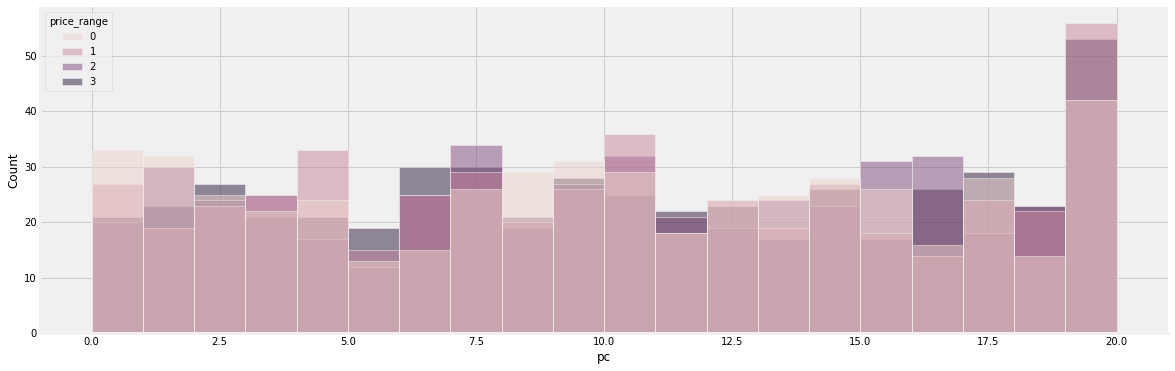

In [ ]:
bins = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]
plt.figure(figsize=(18, 6))
sns.histplot(data=df, x="pc", bins=bins, hue="price_range");
sns.despine(top=True, right=True)

Dari visualisasi diatas fitur pc tidak memiliki pengaruh dalam penentuan kisaran harga ponsel

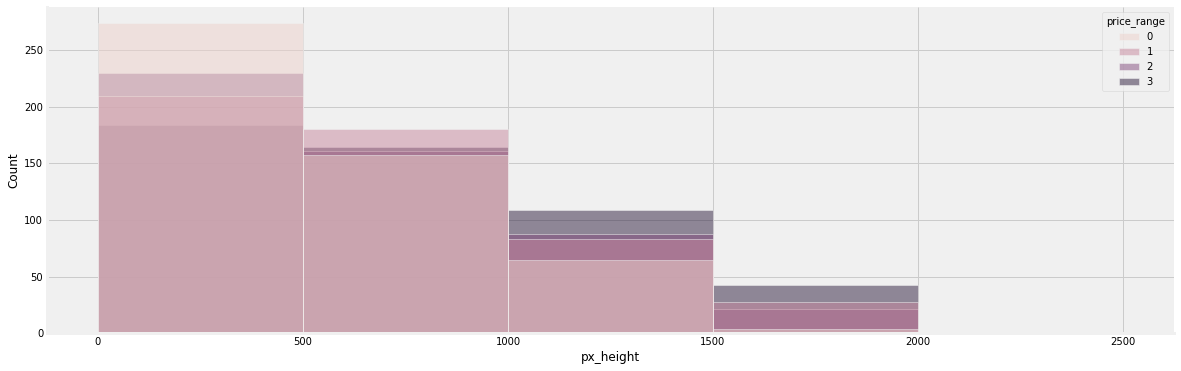

In [ ]:
bins = [0, 500, 1000, 1500, 2000, 2500]
plt.figure(figsize=(18, 6))
sns.histplot(data=df, x="px_height", bins=bins, hue="price_range");
sns.despine(top=True, right=True)

Dari visualisasi diatas terlihat bahwa: 


*   label 3 hanya berada pada rentang nilai 1000 - 2000
*   label 2 berada pada rentang nilai 500 - 2000
*   label 1 berada pada rentang nilai 0 - 2000
*   label 0 berada pada rentang nilai 0 - 1500

Sehingga dapat dilihat bahwa fitur pixel resolution height memiliki pengaruh dalam penentuan kisaran harga ponsel




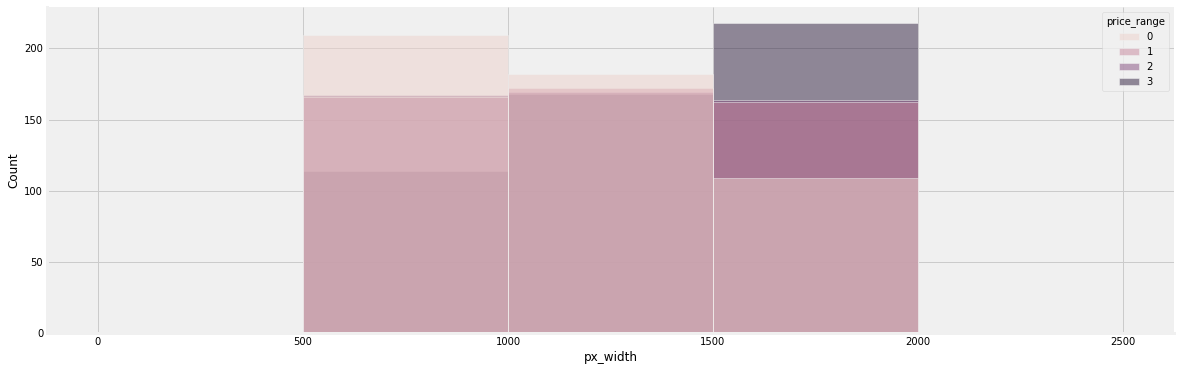

In [ ]:
bins = [0, 500, 1000, 1500, 2000, 2500]
plt.figure(figsize=(18, 6))
sns.histplot(data=df, x="px_width", bins=bins, hue="price_range");
sns.despine(top=True, right=True)

Dari visualisasi diatas terlihat bahwa: 


*   label 3 hanya berada pada rentang nilai 1500 - 2000
*   label 2 berada pada rentang nilai 1000 - 2000
*   label 1 berada pada rentang nilai 500 - 2000
*   label 0 berada pada rentang nilai 0 - 1500

Sehingga dapat dilihat bahwa fitur pixel resolution width memiliki pengaruh dalam penentuan kisaran harga ponsel




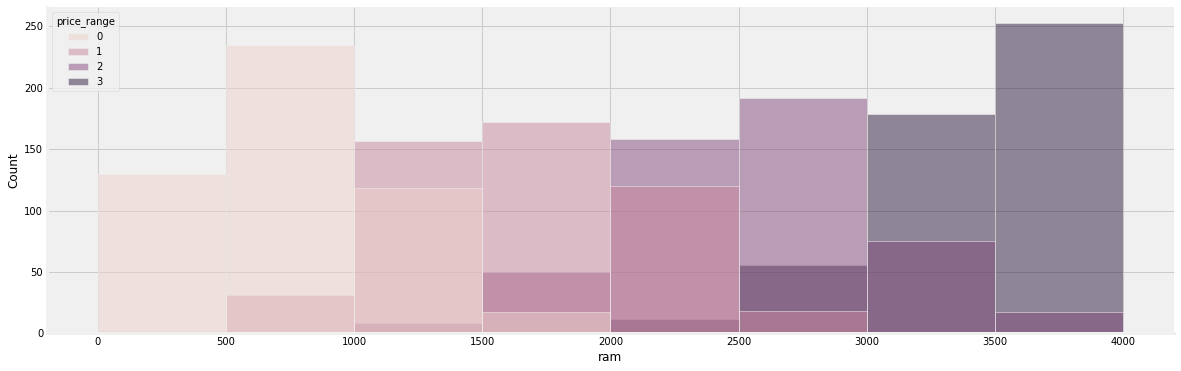

In [ ]:
bins = [0, 500, 1000, 1500, 2000, 2500, 3000, 3500, 4000]
plt.figure(figsize=(18, 6))
sns.histplot(data=df, x="ram", bins=bins, hue="price_range");
sns.despine(top=True, right=True)

Dari visualisasi diatas terlihat bahwa: 


*   label 3 hanya berada pada rentang nilai 3500 -4000
*   label 2 berada pada rentang nilai 2500 - 4000
*   label 1 berada pada rentang nilai 500 - 3000
*   label 0 berada pada rentang nilai 0 - 2000

Sehingga dapat dilihat bahwa fitur random access memory memiliki pengaruh dalam penentuan kisaran harga ponsel




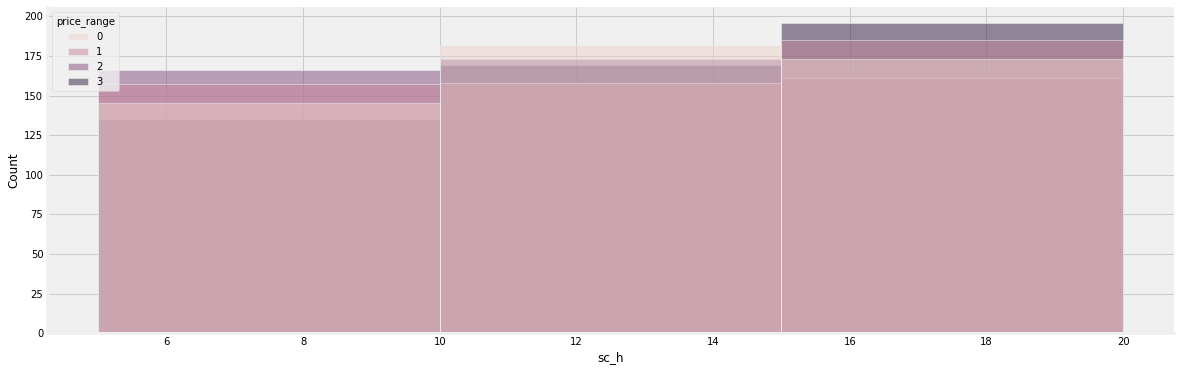

In [ ]:
bins = [5, 10, 15, 20]
plt.figure(figsize=(18, 6))
sns.histplot(data=df, x="sc_h", bins=bins, hue="price_range");
sns.despine(top=True, right=True)

Dari visualisasi diatas fitur sc_h tidak memiliki pengaruh dalam penentuan kisaran harga ponsel

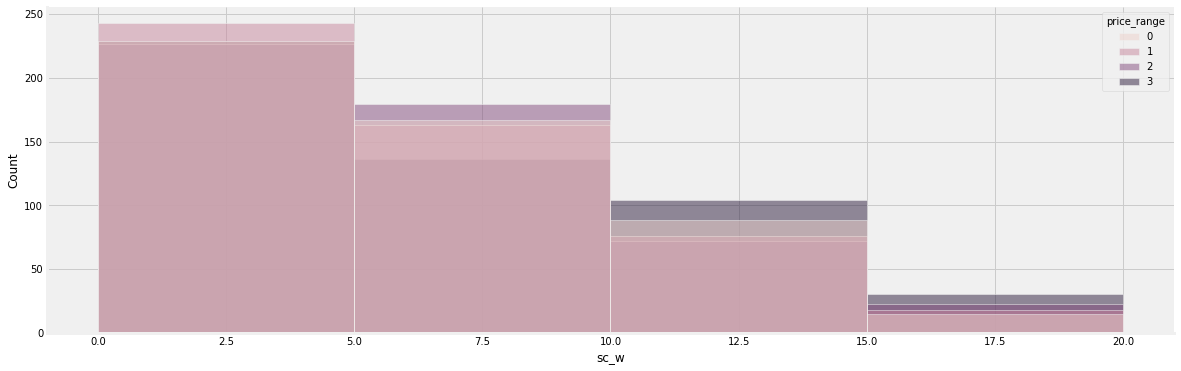

In [ ]:
bins = [0, 5, 10, 15, 20]
plt.figure(figsize=(18, 6))
sns.histplot(data=df, x="sc_w", bins=bins, hue="price_range");
sns.despine(top=True, right=True)

Dari visualisasi diatas terlihat bahwa: 


*   label 3 hanya berada pada rentang nilai 10 -20
*   label 2 berada pada rentang nilai 5 - 20
*   label 1 dan 0 berada pada rentang nilai 0 - 20

Sehingga dapat dilihat bahwa fitur screen Width of mobile cukup memiliki pengaruh dalam penentuan kisaran harga ponsel

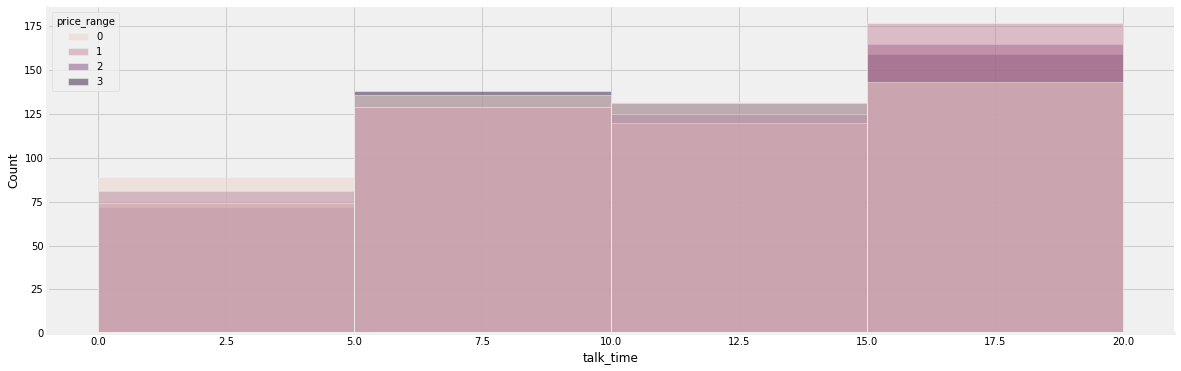

In [ ]:
bins = [0, 5, 10, 15, 20]
plt.figure(figsize=(18, 6))
sns.histplot(data=df, x="talk_time", bins=bins, hue="price_range");
sns.despine(top=True, right=True)

Dari visualisasi diatas fitur talk_time tidak memiliki pengaruh dalam penentuan kisaran harga ponsel

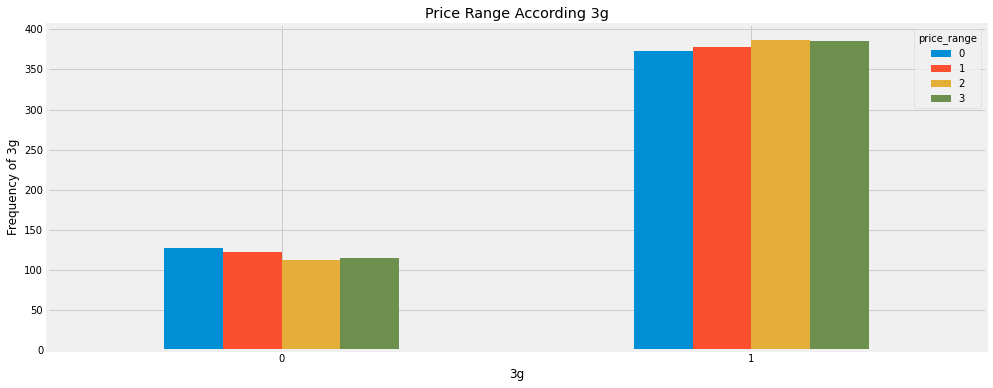

In [ ]:
pd.crosstab(df.three_g, df.price_range).plot(kind="bar",figsize=(15,6))
plt.title('Price Range According 3g')
plt.xlabel('3g')
plt.xticks(rotation = 0)
plt.ylabel('Frequency of 3g')
plt.show()

Dari informasi yang diberikan oleh visualisasi di atas terlihat bahwa ada beberapa ponsel yang tidak memiliki 3g namun memiliki kisaran harga yang tinggi, sehingga dapat disimpulkan fitur three_g tidak memiliki pengaruh dalam menentukan kisaran harga ponsel

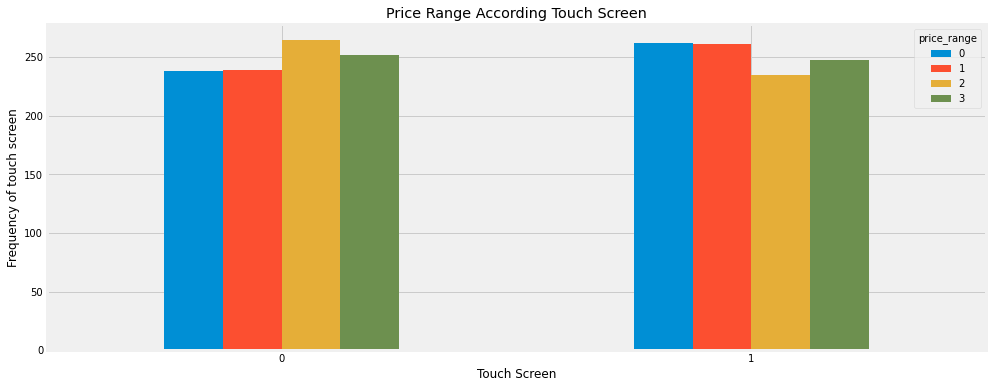

In [ ]:
pd.crosstab(df.touch_screen, df.price_range).plot(kind="bar",figsize=(15,6))
plt.title('Price Range According Touch Screen')
plt.xlabel('Touch Screen')
plt.xticks(rotation = 0)
plt.ylabel('Frequency of touch screen')
plt.show()

Dari informasi yang diberikan oleh visualisasi di atas terlihat bahwa ada beberapa ponsel yang tidak memiliki fitur touch screen namun memiliki kisaran harga yang tinggi, sehingga dapat disimpulkan fitur touch screen tidak memiliki pengaruh dalam menentukan kisaran harga ponsel

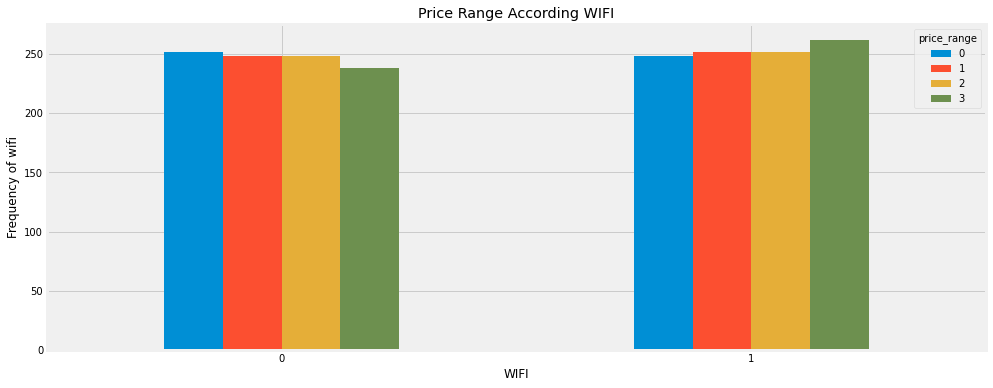

In [ ]:
pd.crosstab(df.wifi, df.price_range).plot(kind="bar",figsize=(15,6))
plt.title('Price Range According WIFI')
plt.xlabel('WIFI')
plt.xticks(rotation = 0)
plt.ylabel('Frequency of wifi')
plt.show()

Dari informasi yang diberikan oleh visualisasi di atas terlihat bahwa ada beberapa ponsel yang tidak memiliki fitur wifi namun memiliki kisaran harga yang tinggi, sehingga dapat disimpulkan fitur wifi tidak memiliki pengaruh dalam menentukan kisaran harga ponsel

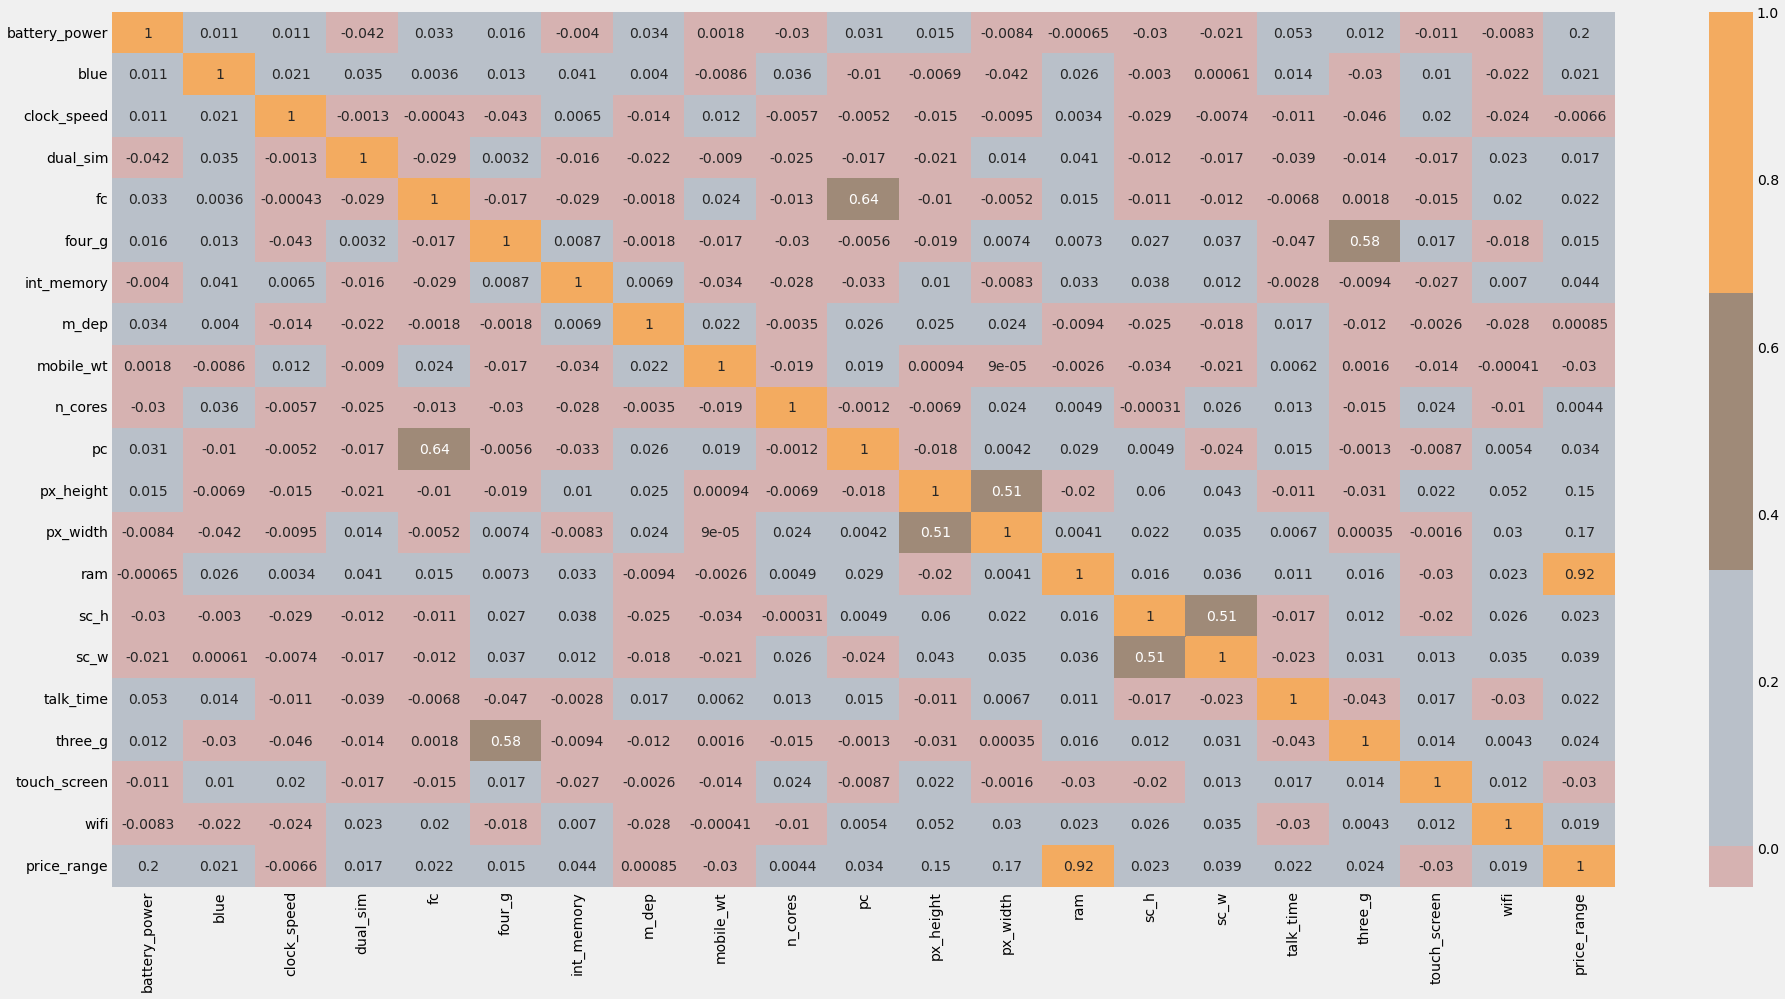

In [18]:
cmap = colors.ListedColormap(["#682F2F", "#9E726F", "#D6B2B1", "#B9C0C9", "#9F8A78", "#F3AB60"])
#correlation matrix
corrmat= df.corr()
plt.figure(figsize=(30,15))  
sns.heatmap(corrmat,annot=True, cmap=cmap, center=0)

Dari proses tersebut dapat kita liat bahwa ada beberapa fitur yang memiliki nilai korelasi tertinggi terhadap target (price_range) yaitu:
1. ram
2. battery_power
3. px_width
4. px_height
5. mobile_wt

###**KESIMPULAN ANALYSIS EDA**

---
FITUR YANG MEMPENGARUHI KISARAN HARGA PONSEL BASED ON EDA

---

*   battery_power, semakin tinggi nilai fitur ini semakin tinggi kisaran harga ponsel
*   ram, semakin tinggi nilai fitur ini semakin tinggi kisaran harga ponsel 
*   px_height, semakin tinggi nilai fitur ini semakin tinggi kisaran harga ponsel
*   px_width, semakin tinggi nilai fitur ini semakin tinggi kisaran harga ponsel
---
FITUR YANG MEMPENGARUHI KISARAN HARGA PONSEL BASED ON CORRELATION SCORE

---
Terdapat beberapa fitur yang memiliki nilai korelasi tertinggi terhadap target (price_range) yaitu:
1. ram
2. battery_power
3. px_width
4. px_height
5. mobile_wt









#6. PREPROCESSING DATA

###6.1 SPLIT DATA

In [ ]:
X = df.drop('price_range', axis = 1)
y = df.price_range

Saya memutuskan untuk membagi proporsi data train dan data test sebesar 80:20. 80% untuk data train dan 20% untuk data test.

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 28)

###6.2 HANDLING OUTLIER

**Saya melakukan capping untuk menghandle variabel yang mengandung outlier dengan presentase outlier diatas 3% - 15%. Dan melakukan trimming untuk menghandle variabel yang mengandung outlier dengan presentase outlier dibawah 3%**

**Dan melakukan analisis pada fitur dengan outlier diatas 15%**

#####X_train

In [ ]:
'''
Menampilkan presentasi outlier pada X_train

'''
 
for k, v in X_train.items():
  q1 = v.quantile(0.25)
  q3 = v.quantile(0.75)
  irq = q3 - q1
  v_col = v[(v <= q1 - 1.5 * irq) | (v >= q3 + 1.5 * irq)]
  perc = np.shape(v_col)[0] * 100.0 / np.shape(X_train)[0]
  print("Column %s outliers = %.2f%%" % (k, perc))

Column battery_power outliers = 0.00%
Column blue outliers = 0.00%
Column clock_speed outliers = 0.00%
Column dual_sim outliers = 0.00%
Column fc outliers = 2.12%
Column four_g outliers = 0.00%
Column int_memory outliers = 0.00%
Column m_dep outliers = 0.00%
Column mobile_wt outliers = 0.00%
Column n_cores outliers = 0.00%
Column pc outliers = 0.00%
Column px_height outliers = 0.06%
Column px_width outliers = 0.00%
Column ram outliers = 0.00%
Column sc_h outliers = 0.00%
Column sc_w outliers = 0.00%
Column talk_time outliers = 0.00%
Column three_g outliers = 100.00%
Column touch_screen outliers = 0.00%
Column wifi outliers = 0.00%


In [ ]:
# Function to create histogram and boxplot.
# Function takes a dataframe (df) and the variable of interest as arguments

def diagnostic_plots(df, variable):
    # Define figure size
    plt.figure(figsize=(16, 4))

    # Histogram
    plt.subplot(1, 2, 1)
    sns.histplot(df[variable], bins=30)
    plt.title('Histogram')

    # Boxplot
    plt.subplot(1, 2, 2)
    sns.boxplot(y=df[variable])
    plt.title('Boxplot')

    plt.show()

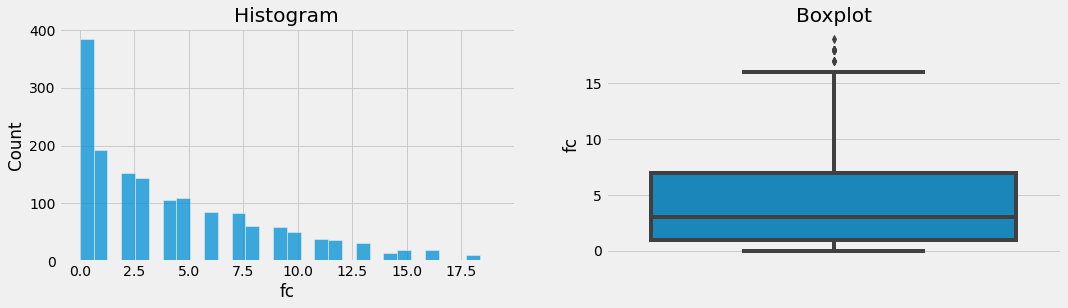

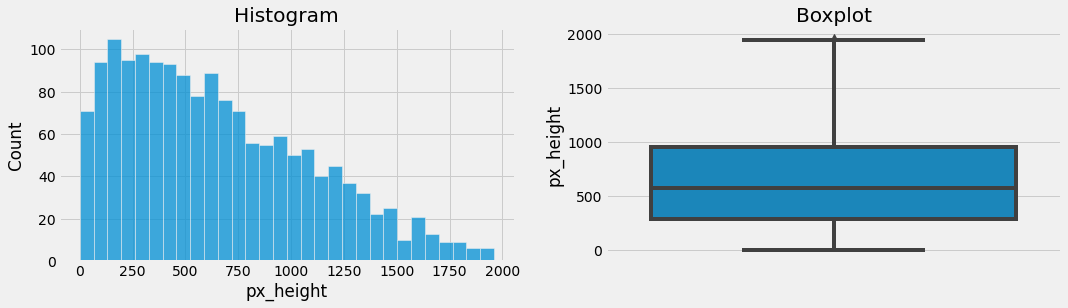

In [ ]:
'''
Saya menggunakan trimming untuk menghandle variabel yang mengandung outlier 
dengan presentase outlier sama dengan dan dibawah 3%

Column fc outliers = 2.12%
Column px_height outliers = 0.06%

'''

diagnostic_plots(X_train, 'fc')
diagnostic_plots(X_train, 'px_height')

In [ ]:
# Function to find upper and lower boundaries for skewed distributed variables
# Let's calculate the boundaries outside which sit the outliers for skewed distributions
# Distance passed as an argument, gives us the option to estimate 1.5 times or 3 times the IQR to calculate the boundaries.

def find_skewed_boundaries(df, variable, distance):
    IQR = df[variable].quantile(0.75) - df[variable].quantile(0.25)

    lower_boundary = df[variable].quantile(0.25) - (IQR * distance)
    upper_boundary = df[variable].quantile(0.75) + (IQR * distance)

    return upper_boundary, lower_boundary

In [ ]:
# Limits for `fc`
fc_upper_limit, fc_lower_limit = find_skewed_boundaries(X_train, 'fc', 1.5)
fc_upper_limit, fc_lower_limit

# Limits for `px_height`
px_height_upper_limit, px_height_lower_limit = find_skewed_boundaries(X_train, 'px_height', 1.5)
px_height_upper_limit, px_height_lower_limit

print('fc_upper_limit : ', fc_upper_limit)
print('fc_lower_limit : ', fc_lower_limit, '\n')
print('px_height_upper_limit : ', px_height_upper_limit)
print('px_height_lower_limit : ', px_height_lower_limit)

fc_upper_limit :  16.0
fc_lower_limit :  -8.0 

px_height_upper_limit :  1951.625
px_height_lower_limit :  -713.375


In [ ]:
index_drop_train = X_train.index[X_train['fc'] > fc_upper_limit]
index_drop_train.nunique()

15

In [ ]:
X_train = X_train.drop(index_drop_train.tolist())
y_train = y_train.drop(index_drop_train.tolist())
print(X_train.shape)
print(y_train.shape)

(1585, 20)
(1585,)


In [ ]:
index_drop_train = X_train.index[X_train['px_height'] > px_height_upper_limit]
index_drop_train.nunique()

1

In [ ]:
X_train = X_train.drop(index_drop_train.tolist())
y_train = y_train.drop(index_drop_train.tolist())
print(X_train.shape)
print(y_train.shape)

(1584, 20)
(1584,)


#####X_test

In [ ]:
'''
Menampilkan presentasi outlier pada X_test

'''
 
for k, v in X_test.items():
  q1 = v.quantile(0.25)
  q3 = v.quantile(0.75)
  irq = q3 - q1
  v_col = v[(v <= q1 - 1.5 * irq) | (v >= q3 + 1.5 * irq)]
  perc = np.shape(v_col)[0] * 100.0 / np.shape(X_test)[0]
  print("Column %s outliers = %.2f%%" % (k, perc))

Column battery_power outliers = 0.00%
Column blue outliers = 0.00%
Column clock_speed outliers = 0.00%
Column dual_sim outliers = 0.00%
Column fc outliers = 2.00%
Column four_g outliers = 0.00%
Column int_memory outliers = 0.00%
Column m_dep outliers = 0.00%
Column mobile_wt outliers = 0.00%
Column n_cores outliers = 0.00%
Column pc outliers = 0.00%
Column px_height outliers = 0.25%
Column px_width outliers = 0.00%
Column ram outliers = 0.00%
Column sc_h outliers = 0.00%
Column sc_w outliers = 0.00%
Column talk_time outliers = 0.00%
Column three_g outliers = 0.00%
Column touch_screen outliers = 0.00%
Column wifi outliers = 0.00%


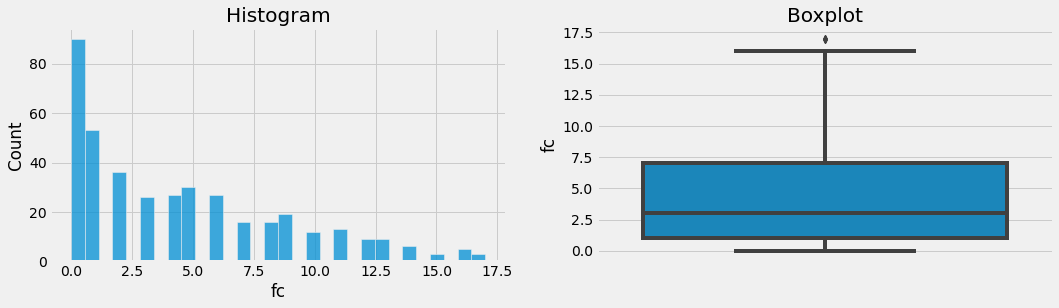

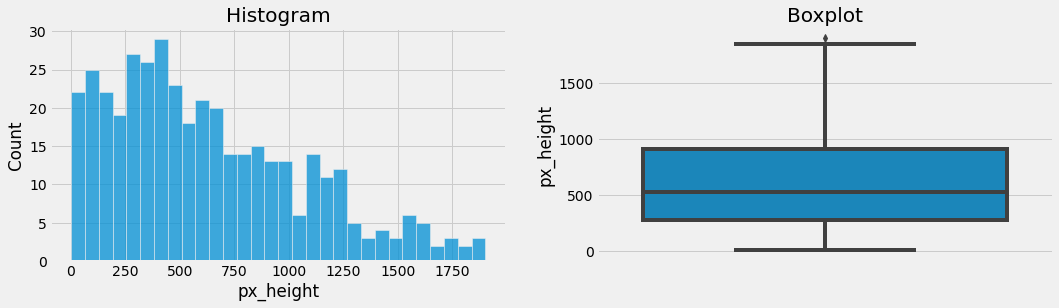

In [ ]:
'''
Saya menggunakan trimming untuk menghandle variabel yang mengandung outlier 
dengan presentase outlier sama dengan dan dibawah 3%

Column fc outliers = 2.00%
Column px_height outliers = 0.25%

'''

diagnostic_plots(X_test, 'fc')
diagnostic_plots(X_test, 'px_height')

In [ ]:
# Limits for `fc`
fc_upper_limit, fc_lower_limit = find_skewed_boundaries(X_test, 'fc', 1.5)
fc_upper_limit, fc_lower_limit

# Limits for `px_height`
px_height_upper_limit, px_height_lower_limit = find_skewed_boundaries(X_test, 'px_height', 1.5)
px_height_upper_limit, px_height_lower_limit

print('fc_upper_limit : ', fc_upper_limit)
print('fc_lower_limit : ', fc_lower_limit, '\n')
print('px_height_upper_limit : ', px_height_upper_limit)
print('px_height_lower_limit : ', px_height_lower_limit)

fc_upper_limit :  16.0
fc_lower_limit :  -8.0 

px_height_upper_limit :  1867.625
px_height_lower_limit :  -679.375


In [ ]:
index_drop_test = X_test.index[X_test['fc'] > fc_upper_limit]
index_drop_test.nunique()

3

In [ ]:
X_test = X_test.drop(index_drop_test.tolist())
y_test = y_test.drop(index_drop_test.tolist())
print(X_test.shape)
print(y_test.shape)

(397, 20)
(397,)


In [ ]:
index_drop_test = X_test.index[X_test['px_height'] > px_height_upper_limit]
index_drop_test.nunique()

1

In [ ]:
X_test = X_test.drop(index_drop_test.tolist())
y_test = y_test.drop(index_drop_test.tolist())
print(X_test.shape)
print(y_test.shape)

(396, 20)
(396,)


###6.3 FEATURE SELECTION

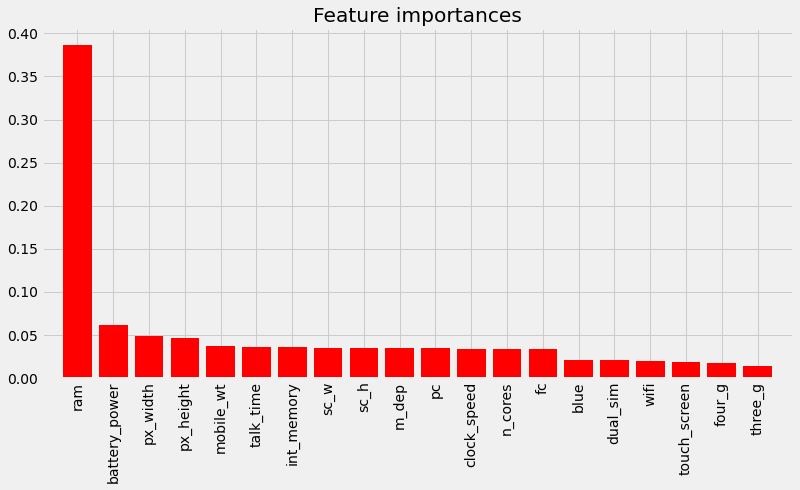

In [ ]:
from sklearn.ensemble import ExtraTreesClassifier

# feature extraction
model = ExtraTreesClassifier(n_estimators=400)
model.fit(X, y)

# feature_importances_ dari highest ke lowest
sorted_idx = np.argsort(model.feature_importances_)
sorted_idx = sorted_idx[::-1]

# plot feature importances
plt.figure(figsize=(12,6))
plt.title("Feature importances")
plt.bar(range(X.shape[1]), model.feature_importances_[sorted_idx],
        color="r", align="center")
plt.xticks(range(X.shape[1]), X.columns[sorted_idx], rotation=90)
plt.xlim([-1, X.shape[1]])
plt.show()

Dari proses tersebut dapat kita liat bahwa ada beberapa fitur yang sangat penting yaitu:
1. ram
2. battery_power
3. px_width
4. px_height
5. mobile_wt

kalau kita lihat dari list fitur tersebut juga terdapat pada list yang berkolerasi tinggi di correlation matrix, maka kita dapat menggunakan fitur-fitur tersebut untuk membuat model.

In [ ]:
X_train = X_train.loc[:, ['ram', 'battery_power', 'px_width', 'px_height', 'mobile_wt']]
X_test = X_test.loc[:, ['ram', 'battery_power', 'px_width', 'px_height', 'mobile_wt']]

#7. PIPELINE & HYPERPARAMETER TUNNING

In [ ]:
from sklearn.pipeline import Pipeline
from xgboost import XGBClassifier
from sklearn.ensemble import AdaBoostClassifier

pipe_xgb = Pipeline([
('scaler', StandardScaler()),
('classifier', XGBClassifier(random_state=28))])

pipe_ada = Pipeline([
('scaler', StandardScaler()),
('classifier', AdaBoostClassifier())])

param_xgb = {'scaler': [StandardScaler(),MinMaxScaler()],
             'classifier__learning_rate':[0.1,0.01,0.001],
             'classifier__n_estimators':np.arange(100,501,100),
             'classifier__max_depth':np.arange(2,8),
             }

param_ada = {'scaler': [StandardScaler(),MinMaxScaler()],
            'classifier__learning_rate':[0.1, 0.01, 0.001],
            'classifier__n_estimators':np.arange(100, 501, 100)
            }

     |████████████████████████████████| 76.3 MB 1.3 MB/s 


#8. TRAIN MODEL WITH GRIDSEARCH CV

###8.1 XGBOOST CLASSIFIER

In [ ]:
from sklearn.model_selection import GridSearchCV
grid_xgb = GridSearchCV(pipe_xgb, param_xgb, cv=5).fit(X_train, y_train)

In [ ]:
print('Training set score: ' + str(grid_xgb.score(X_train, y_train)))
print('Test set score: ' + str(grid_xgb.score(X_test, y_test)))

Training set score: 1.0
Test set score: 0.9090909090909091


In [ ]:
# Access the best set of parameters
best_params_xgb = grid_xgb.best_params_
print(best_params_xgb)

# simpan optimum model
best_pipe_xgb = grid_xgb.best_estimator_
print(best_pipe_xgb)
 
result_df_xgb = pd.DataFrame.from_dict(grid_xgb.cv_results_, orient='columns')
print(result_df_xgb.columns)

{'classifier__learning_rate': 0.1, 'classifier__max_depth': 7, 'classifier__n_estimators': 400, 'scaler': StandardScaler()}
Pipeline(steps=[('scaler', StandardScaler()),
                ('classifier',
                 XGBClassifier(max_depth=7, n_estimators=400,
                               objective='multi:softprob', random_state=28))])
Index(['mean_fit_time', 'std_fit_time', 'mean_score_time', 'std_score_time',
       'param_classifier__learning_rate', 'param_classifier__max_depth',
       'param_classifier__n_estimators', 'param_scaler', 'params',
       'split0_test_score', 'split1_test_score', 'split2_test_score',
       'split3_test_score', 'split4_test_score', 'mean_test_score',
       'std_test_score', 'rank_test_score'],
      dtype='object')


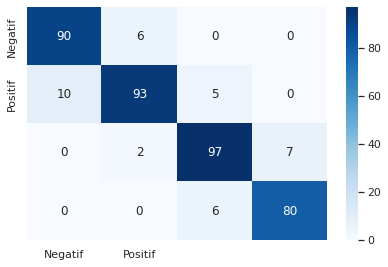

In [ ]:
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

cf_matrix_xgb = confusion_matrix(y_test, best_pipe_xgb.predict(X_test))

# figure size
sns.set(rc={'figure.figsize':(6,4)})

#plotting confusion matrix
ax = sns.heatmap(cf_matrix_xgb, annot=True,cmap='Blues', fmt='g')
ax.set_xticklabels(["Negatif", "Positif"])
ax.set_yticklabels(["Negatif", "Positif"])
plt.show()

In [ ]:
print(classification_report(y_test, best_pipe_xgb.predict(X_test)))

              precision    recall  f1-score   support

           0       0.90      0.94      0.92        96
           1       0.92      0.86      0.89       108
           2       0.90      0.92      0.91       106
           3       0.92      0.93      0.92        86

    accuracy                           0.91       396
   macro avg       0.91      0.91      0.91       396
weighted avg       0.91      0.91      0.91       396



###8.2 ADABOOST CLASSIFIER

In [ ]:
grid_ada = GridSearchCV(pipe_ada, param_ada, cv=5).fit(X_train, y_train)

In [ ]:
print('Training set score: ' + str(grid_ada.score(X_train, y_train)))
print('Test set score: ' + str(grid_ada.score(X_test, y_test)))

Training set score: 0.7329545454545454
Test set score: 0.7121212121212122


In [ ]:
# Access the best set of parameters
best_params_ada = grid_ada.best_params_
print(best_params_ada)

# simpan optimum model
best_pipe_ada = grid_ada.best_estimator_
print(best_pipe_ada)
 
result_df_ada = pd.DataFrame.from_dict(grid_ada.cv_results_, orient='columns')
print(result_df_ada.columns)

{'classifier__learning_rate': 0.001, 'classifier__n_estimators': 300, 'scaler': StandardScaler()}
Pipeline(steps=[('scaler', StandardScaler()),
                ('classifier',
                 AdaBoostClassifier(learning_rate=0.001, n_estimators=300))])
Index(['mean_fit_time', 'std_fit_time', 'mean_score_time', 'std_score_time',
       'param_classifier__learning_rate', 'param_classifier__n_estimators',
       'param_scaler', 'params', 'split0_test_score', 'split1_test_score',
       'split2_test_score', 'split3_test_score', 'split4_test_score',
       'mean_test_score', 'std_test_score', 'rank_test_score'],
      dtype='object')


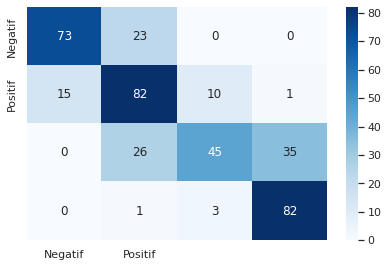

In [ ]:
cf_matrix_ada = confusion_matrix(y_test, best_pipe_ada.predict(X_test))

# figure size
sns.set(rc={'figure.figsize':(6,4)})

#plotting confusion matrix
ax = sns.heatmap(cf_matrix_ada, annot=True,cmap='Blues', fmt='g')
ax.set_xticklabels(["Negatif", "Positif"])
ax.set_yticklabels(["Negatif", "Positif"])
plt.show()

In [ ]:
print(classification_report(y_test, best_pipe_ada.predict(X_test)))

              precision    recall  f1-score   support

           0       0.83      0.76      0.79        96
           1       0.62      0.76      0.68       108
           2       0.78      0.42      0.55       106
           3       0.69      0.95      0.80        86

    accuracy                           0.71       396
   macro avg       0.73      0.72      0.71       396
weighted avg       0.73      0.71      0.70       396



#9. BEST MODEL

In [ ]:
xgb = grid_xgb.score(X_test, y_test)
ada = grid_ada.score(X_test, y_test)

In [ ]:
print(round(xgb, 4))
print(round(ada, 4))

0.9091
0.7121


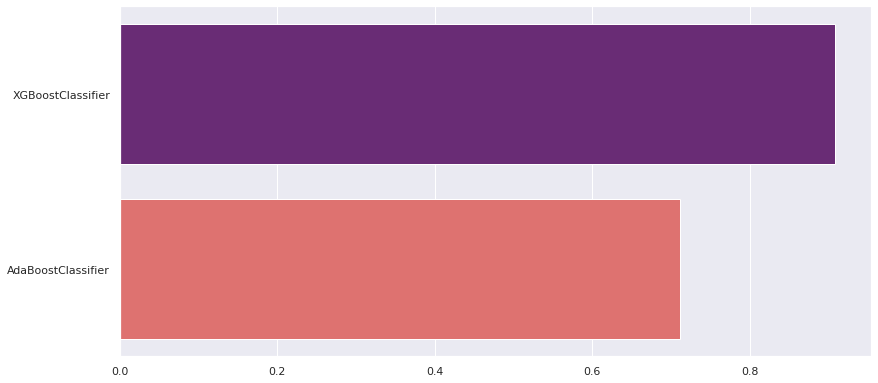

In [ ]:
plt.figure(figsize=(12,6))
model_acc = [xgb, ada]
model_name = ['XGBoostClassifier', 'AdaBoostClassifier']
sns.barplot(x= model_acc, y=model_name, palette='magma')

Karena label pada fitur target proporsinya balance, sehingga saya memutuskan untuk mempertimbangkan model terbaik based on accuracy score. Dari visualisasi di atas perbandingan antara kedua model yang sudah dibangun, model dengan akurasi tertinggi adalah XGBoost classifier sehingga saya memutuskan untuk menggunkan XGBoost untuk digunakan dalam model inference.

###8.3 SAVE MODEL

In [ ]:
import pickle

# Dictionary of best parameters
best_pars = grid_xgb.best_params_
# Best XGB model that was found based on the metric score you specify
best_model = grid_xgb.best_estimator_
# Save model
pickle.dump(grid_xgb.best_estimator_, open("xgb.pickle", "wb"))

#9. MODEL INFERENCE

###9.1 LOAD MODEL

In [ ]:
import pickle

In [ ]:
xgb_model = pickle.load(open('xgb (1).pickle', 'rb'))

In [ ]:
new_data = {'ram' : 2453, 'battery_power':1456, 'px_width':983, 'px_height':782,
       'mobile_wt': 129}

pred = pd.DataFrame(new_data, index = ['NewMobileSpecification'])
pred

,ram,battery_power,px_width,px_height,mobile_wt
NewMobileSpecification,2453,1456,983,782,129


###9.2 PREDICT NEW DATA

In [ ]:
xgb_model.predict(pred)

array([2])

Setelah dilakukan prediksi pada spesifikasi ponsel baru, hasil prediksi menunjukkan bahwa model tersebut memiliki kisaran harga yang tinggi (high cost)

#10. KESIMPULAN

###**OVERALL ANALYSIS**

---
FITUR YANG MEMPENGARUHI KISARAN HARGA PONSEL BASED ON EDA

---

*   battery_power, semakin tinggi nilai fitur ini semakin tinggi kisaran harga ponsel
*   ram, semakin tinggi nilai fitur ini semakin tinggi kisaran harga ponsel 
*   px_height, semakin tinggi nilai fitur ini semakin tinggi kisaran harga ponsel
*   px_width, semakin tinggi nilai fitur ini semakin tinggi kisaran harga ponsel
---
FITUR YANG MEMPENGARUHI KISARAN HARGA PONSEL BASED ON CORRELATION SCORE

---
Terdapat beberapa fitur yang memiliki nilai korelasi tertinggi terhadap target (price_range) yaitu:
1. ram
2. battery_power
3. px_width
4. px_height
5. mobile_wt

---
FITUR YANG MEMPENGARUHI KISARAN HARGA PONSEL BASED ON FEATURE IMPORTANCE

---
Terdapat beberapa fitur yang sangat penting yaitu:
1. ram
2. battery_power
3. px_width
4. px_height
5. mobile_wt

---
BEST MODEL MACHINE LEARNING UNTUK PREDIKSI KISARAN HARGA PONSEL

---
Karena label pada fitur target proporsinya balance, sehingga saya memutuskan untuk mempertimbangkan model terbaik based on accuracy score. Dari visualisasi di atas perbandingan antara kedua model yang sudah dibangun, model dengan akurasi tertinggi adalah XGBoost classifier sehingga saya memutuskan untuk menggunakan XGBoost untuk digunakan dalam memprediksi data baru.










